<a href="https://colab.research.google.com/github/thiagoaprado22/Social_Data_Science/blob/main/An%C3%A1lise_Descritiva__Situa%C3%A7%C3%A3o_de_Rua_PBH_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=red size=5>**ANÁLISE DESCRITIVA DOS DADOS DA POPULAÇÃO EM SITUAÇÃO DE RUA EM BELO HORIONTE EM 2022 CADASTRADAS NO CADUNICO DA PBH**</font>
***




[![author](https://img.shields.io/badge/author-ThiagoPrado-blue.svg)](https://www.linkedin.com/in/thiago-de-almeida-prado-2a53601b9)
[![stability-experimental](https://img.shields.io/badge/stability-experimental-orange.svg)](https://github.com/mkenney/software-guides/blob/master/STABILITY-BADGES.md#experimental) 
[![contributions welcome](https://img.shields.io/badge/contributions-welcome-brightgreen.svg?style=flat)](https://github.com/thiagoaprado22)

### <font color=black>1 CONHECENDO OS DADOS</font>
***


#### <font color=black>1.1) Dataset do Projeto</font>
***

**População de Rua no município de Belo Horizonte**, no mês de Setembro de 2020 que apresenta um grupo populacional heterogêneo, composto por pessoas com diferentes realidades, mas que têm em comum a condição de pobreza absoluta, vínculos interrompidos ou fragilizados e falta de habitação, **cadastrados no sistema do Cadastro Único**, na Cidade de Belo Horizonte.

Fonte:  **Prefeitura de Belo Horizonte - Portal de Dados Aberto** disponível em: https://dados.pbh.gov.br/dataset/populacao-de-rua

*Dados atualizados pela última vez	: Setembro/2022*

In [36]:
import seaborn as sns
import pandas  as pd
import matplotlib.pyplot as plt
url = 'https://ckan.pbh.gov.br/dataset/1f868d62-d7c3-4121-8ffa-9ed66d71d3e2/resource/aa8477c0-81fc-442c-b1bf-25475674adda/download/4-data_set_poprua_cadunico_09-2020.csv'
dados_rua = pd.read_csv(url , sep =';')
dados_rua.head()

,TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,BOLSA_FAMILIA,POP_RUA,GRAU_INSTRUCAO,COR_RACA,Faixa da renda familiar per capita,VAL_REMUNERACAO_MES_PASSADO,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA
0,Entre um e dois anos,Todo mes,07/06/1958,62,FEMININO,SIM,SIM,Fundamental incompleto,Preta,Ate R$89.00,60.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,01/09/2020
1,Ate seis meses,Quase nunca,04/06/1986,34,MASCULINO,NAO,SIM,Medio incompleto,Parda,Acima de 0.5 Salario Minimo,0.0,ENDERECO FORA DE AREA CRAS,NORDESTE,ate 12 Meses,01/09/2020
2,Entre cinco e dez anos,Nunca,03/10/1963,56,FEMININO,SIM,SIM,Fundamental incompleto,Parda,Ate R$89.00,50.0,ENDERECO FORA DE AREA CRAS,OESTE,37 a 48 Meses,01/09/2020
3,Ate seis meses,Todo dia,03/04/1958,62,FEMININO,NAO,SIM,Fundamental incompleto,Parda,Acima de 0.5 Salario Minimo,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,01/09/2020
4,Entre cinco e dez anos,Todo ano,11/08/1960,60,MASCULINO,SIM,SIM,Fundamental incompleto,Parda,Ate R$89.00,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,ate 12 Meses,01/09/2020


**Distribuição de Gênero**

In [2]:
dados_rua['SEXO'].value_counts()


MASCULINO    7976
FEMININO     1000
Name: SEXO, dtype: int64

In [3]:
frequencia = dados_rua['SEXO'].value_counts()

In [4]:
dados_rua['SEXO'].value_counts(normalize = True)

MASCULINO    0.888592
FEMININO     0.111408
Name: SEXO, dtype: float64

In [5]:
dados_rua['SEXO'].value_counts(normalize = True)*100

MASCULINO    88.85918
FEMININO     11.14082
Name: SEXO, dtype: float64

In [6]:
percentual = dados_rua['SEXO'].value_counts(normalize = True)*100

Text(0.5, 1.0, 'Distribuição percentual de Gênero')

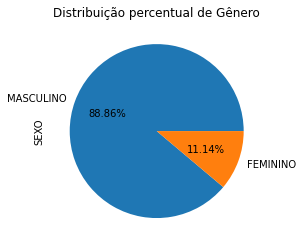

In [7]:
dados_rua['SEXO'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Distribuição percentual de Gênero')

In [8]:
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq


,Frequência,Porcentagem (%)
MASCULINO,7976,88.85918
FEMININO,1000,11.14082


**Distribuição de Idade** 

In [9]:
dados_rua['IDADE']

0       62
1       34
2       56
3       62
4       60
        ..
8971    33
8972    47
8973    49
8974    19
8975    19
Name: IDADE, Length: 8976, dtype: int64

In [10]:
dados_rua['IDADE'].value_counts()

39    338
37    314
40    306
38    304
42    291
     ... 
76      3
13      3
79      2
16      1
12      1
Name: IDADE, Length: 79, dtype: int64

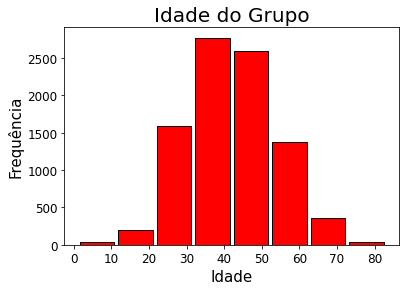

In [11]:
plt.hist(dados_rua['IDADE'], 8 , color='red', rwidth=0.9, edgecolor='black')
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.tick_params(labelsize=12)
plt.title('Idade do Grupo', fontsize=20)
plt.show()

In [12]:
dados_rua['IDADE'].mean()

41.79823975044563

In [13]:
dados_rua['IDADE'].mean().round(0)

42.0

In [14]:
print('A idade média da populaçao em situacao de rua é de aproximadamente {} anos '.format(dados_rua['IDADE'].mean().round(0)))

A idade média da populaçao em situacao de rua é de aproximadamente 42.0 anos 


In [15]:
print('A maior idade encontrada na populaçao em situacao de rua é de aproximadamente {} anos '.format(dados_rua['IDADE'].max()))

A maior idade encontrada na populaçao em situacao de rua é de aproximadamente 83 anos 


In [16]:
print('A menor idade encontrada na populaçao em situacao de rua é de aproximadamente {} anos '.format(dados_rua['IDADE'].min()))

A menor idade encontrada na populaçao em situacao de rua é de aproximadamente 1 anos 


In [17]:
dados_fem = dados_fem = dados_rua.query('SEXO == "FEMININO"')
dados_fem.head()

,TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,BOLSA_FAMILIA,POP_RUA,GRAU_INSTRUCAO,COR_RACA,Faixa da renda familiar per capita,VAL_REMUNERACAO_MES_PASSADO,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA
0,Entre um e dois anos,Todo mes,07/06/1958,62,FEMININO,SIM,SIM,Fundamental incompleto,Preta,Ate R$89.00,60.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,01/09/2020
2,Entre cinco e dez anos,Nunca,03/10/1963,56,FEMININO,SIM,SIM,Fundamental incompleto,Parda,Ate R$89.00,50.0,ENDERECO FORA DE AREA CRAS,OESTE,37 a 48 Meses,01/09/2020
3,Ate seis meses,Todo dia,03/04/1958,62,FEMININO,NAO,SIM,Fundamental incompleto,Parda,Acima de 0.5 Salario Minimo,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,01/09/2020
6,Ate seis meses,Todo mes,15/10/1964,55,FEMININO,SIM,SIM,Fundamental incompleto,Preta,Ate R$89.00,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,19 a 24 Meses,01/09/2020
8,Ate seis meses,Toda semana,17/11/1976,43,FEMININO,SIM,SIM,Sem instrucao,Parda,Ate R$89.00,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,ate 12 Meses,01/09/2020


In [18]:
dados_masc = dados_masc = dados_rua.query('SEXO == "MASCULINO"')

In [19]:
dados_masc.head()

,TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,BOLSA_FAMILIA,POP_RUA,GRAU_INSTRUCAO,COR_RACA,Faixa da renda familiar per capita,VAL_REMUNERACAO_MES_PASSADO,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA
1,Ate seis meses,Quase nunca,04/06/1986,34,MASCULINO,NAO,SIM,Medio incompleto,Parda,Acima de 0.5 Salario Minimo,0.0,ENDERECO FORA DE AREA CRAS,NORDESTE,ate 12 Meses,01/09/2020
4,Entre cinco e dez anos,Todo ano,11/08/1960,60,MASCULINO,SIM,SIM,Fundamental incompleto,Parda,Ate R$89.00,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,ate 12 Meses,01/09/2020
5,Entre cinco e dez anos,Nunca,05/02/1965,55,MASCULINO,SIM,SIM,Fundamental incompleto,Parda,Ate R$89.00,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,ate 12 Meses,01/09/2020
7,Ate seis meses,Todo dia,10/05/1953,67,MASCULINO,NAO,SIM,Fundamental incompleto,Parda,Ate R$89.00,260.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,01/09/2020
9,Mais de dez anos,Nunca,25/10/1959,60,MASCULINO,SIM,SIM,Sem instrucao,Parda,Ate R$89.00,0.0,ENDERECO FORA DE AREA CRAS,LESTE,ate 12 Meses,01/09/2020


**Distribuição de Idade x Genero** 

In [20]:
dados_masc['IDADE'].mean().round(0)

42.0

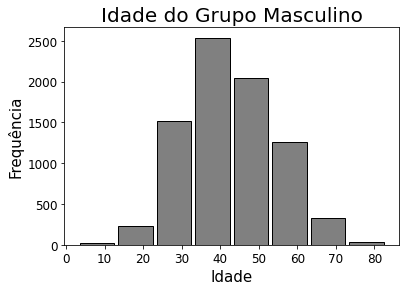

In [21]:
plt.hist(dados_masc['IDADE'], 8 , color='grey', rwidth=0.9, edgecolor='black')
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.tick_params(labelsize=12)
plt.title('Idade do Grupo Masculino', fontsize=20)
plt.show()


In [22]:
dados_fem['IDADE'].mean().round(0)

39.0

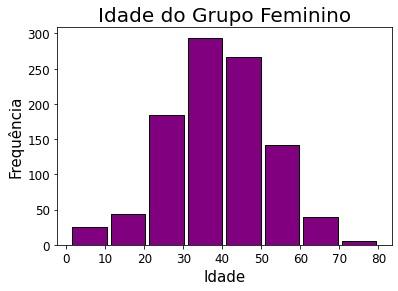

In [23]:
plt.hist(dados_fem['IDADE'], 8 , color='purple', rwidth=0.9, edgecolor='black')
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.tick_params(labelsize=12)
plt.title('Idade do Grupo Feminino', fontsize=20)
plt.show()

In [24]:
dist_genXidade = pd.crosstab(dados_rua['SEXO'], dados_rua['IDADE']).T
dist_genXidade 

SEXO,FEMININO,MASCULINO
IDADE,,
1,3,0
2,3,0
3,1,4
4,5,3
5,3,0
...,...,...
77,0,4
78,0,4
79,0,2


In [25]:
dist_freq_genXidade = pd.crosstab(dados_rua['SEXO'], dados_rua['IDADE'], normalize = True).T * 100
dist_freq_genXidade


SEXO,FEMININO,MASCULINO
IDADE,,
1,0.033422,0.000000
2,0.033422,0.000000
3,0.011141,0.044563
4,0.055704,0.033422
5,0.033422,0.000000
...,...,...
77,0.000000,0.044563
78,0.000000,0.044563
79,0.000000,0.022282




<b>Situação de Vulnerabilidade </b> ► Menor de 14 anos

In [28]:
dados_rua_menor = dados_rua.query('IDADE < 14')

In [43]:
dados_rua_menor

,TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,BOLSA_FAMILIA,POP_RUA,GRAU_INSTRUCAO,COR_RACA,Faixa da renda familiar per capita,VAL_REMUNERACAO_MES_PASSADO,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA
31,Entre dois e cinco anos,Toda semana,25/01/2018,2,FEMININO,SIM,SIM,Nao Informado,Preta,Ate R$89.00,NaN,ENDERECO FORA DE AREA CRAS,LESTE,19 a 24 Meses,01/09/2020
514,Ate seis meses,Todo dia,07/08/2014,6,MASCULINO,SIM,SIM,Sem instrucao,Preta,Ate R$89.00,NaN,ENDERECO FORA DE AREA CRAS,CENTRO SUL,ate 12 Meses,01/09/2020
734,Ate seis meses,Nunca,15/08/2011,9,MASCULINO,SIM,SIM,Sem instrucao,Parda,Ate R$89.00,NaN,ENDERECO FORA DE AREA CRAS,NOROESTE,ate 12 Meses,01/09/2020
870,Entre seis meses e um ano,Todo mes,06/04/2013,7,MASCULINO,SIM,SIM,Sem instrucao,Parda,Entre R$89.01 ate R$178.00,NaN,CRAS VILA SENHOR DOS PASSOS,NOROESTE,19 a 24 Meses,01/09/2020
998,Ate seis meses,Todo mes,15/01/2010,10,FEMININO,SIM,SIM,Fundamental incompleto,Parda,Ate R$89.00,NaN,CRAS PROVIDENCIA,NORTE,ate 12 Meses,01/09/2020
999,Ate seis meses,Todo mes,23/09/2006,13,FEMININO,SIM,SIM,Fundamental incompleto,Parda,Ate R$89.00,NaN,CRAS PROVIDENCIA,NORTE,ate 12 Meses,01/09/2020
1000,Ate seis meses,Todo mes,08/08/2008,12,MASCULINO,SIM,SIM,Fundamental incompleto,Parda,Ate R$89.00,NaN,CRAS PROVIDENCIA,NORTE,ate 12 Meses,01/09/2020
1184,Mais de dez anos,Nunca,28/04/2012,8,MASCULINO,SIM,SIM,Sem instrucao,Parda,Ate R$89.00,NaN,CRAS PROVIDENCIA,NORTE,ate 12 Meses,01/09/2020
1185,Mais de dez anos,Nunca,31/05/2013,7,MASCULINO,SIM,SIM,Sem instrucao,Parda,Ate R$89.00,NaN,CRAS PROVIDENCIA,NORTE,ate 12 Meses,01/09/2020
1404,Entre um e dois anos,Todo mes,25/02/2014,6,MASCULINO,SIM,SIM,Sem instrucao,Parda,Ate R$89.00,NaN,ENDERECO FORA DE AREA CRAS,NORTE,25 a 36 Meses,01/09/2020


In [45]:
dados_rua_menor['SEXO'].value_counts()

FEMININO     27
MASCULINO    19
Name: SEXO, dtype: int64

In [66]:
dados_rua_menor['IDADE'].unique()

array([ 2,  6,  9,  7, 10, 13, 12,  8,  4,  1,  5,  3])

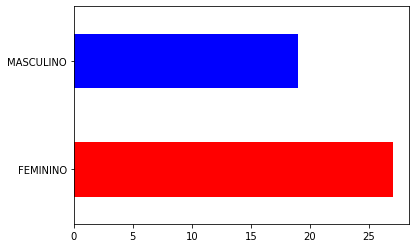

In [50]:
dados_rua_menor['SEXO'].value_counts().plot(kind='barh', color = ['red', 'blue'])

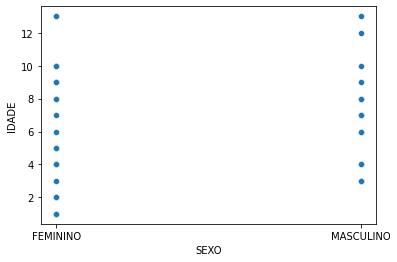

In [52]:
sns.scatterplot(data=dados_rua_menor, x="SEXO", y="IDADE")

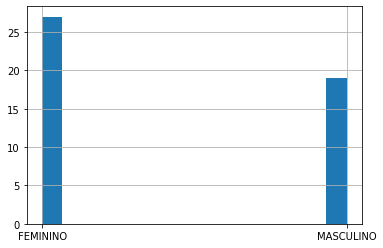

In [60]:
dados_rua_menor['SEXO'].hist(bins=15)

**Distribuição de Raça x Genero** 

In [68]:
dados_rua['COR_RACA'].value_counts()


Parda            5435
Preta            2077
Branca           1404
Amarela            39
Indigena           11
Nao Informado      10
Name: COR_RACA, dtype: int64

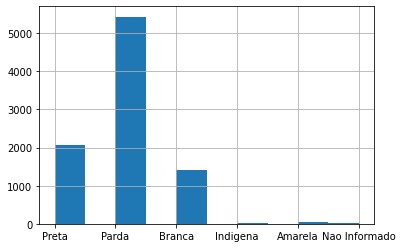

In [70]:
dados_rua['COR_RACA'].hist()

In [74]:
freq_raca = dados_rua['COR_RACA'].value_counts()
freq_raca

Parda            5435
Preta            2077
Branca           1404
Amarela            39
Indigena           11
Nao Informado      10
Name: COR_RACA, dtype: int64

In [73]:
percentual_raca = dados_rua['COR_RACA'].value_counts(normalize = True) * 100
percentual_raca

Parda            60.550357
Preta            23.139483
Branca           15.641711
Amarela           0.434492
Indigena          0.122549
Nao Informado     0.111408
Name: COR_RACA, dtype: float64

In [75]:
dist_freq_raca = pd.DataFrame({'Frequência': freq_raca, 'Porcentagem (%)': percentual_raca})
dist_freq_raca # Sera preciso renomear a coluna que corresponde a 0 e 1

,Frequência,Porcentagem (%)
Parda,5435,60.550357
Preta,2077,23.139483
Branca,1404,15.641711
Amarela,39,0.434492
Indigena,11,0.122549
Nao Informado,10,0.111408


In [78]:
dist_freq_raca.rename_axis('COR_RACA', axis = 'columns', inplace = True)
dist_freq_raca 

COR_RACA,Frequência,Porcentagem (%)
Parda,5435,60.550357
Preta,2077,23.139483
Branca,1404,15.641711
Amarela,39,0.434492
Indigena,11,0.122549
Nao Informado,10,0.111408


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7655185150>,
      dtype=object)

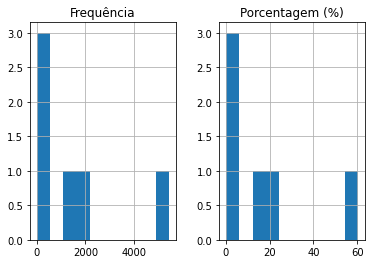

In [81]:
dist_freq_raca.hist()